# Data Acquisition
- Strategy: validate the result of every single block of code in-line with **SRS - 3.4 Task Management & Quality Control** by defining entry and exit criteria as manual test cases

In [1]:
import os
import shutil

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import librosa
import librosa.display

from sklearn.preprocessing import StandardScaler
# !sudo apt-get install p7zip-full

## Definition of Control Variables

In [2]:
GDRIVE_DATA_DIR = "23-24_CE903-SU_team06/dataset/"
AUDIO_FILE = f"{GDRIVE_DATA_DIR}audio_files.7z"
#AUDIO_FILE = "Audio Files.7z"
EXTRACTED_AUDIO_DIR = "AWS Audio Files"
AUDIO_DATA_WORKING_DIR = "audio_dataset"
CSV_FILE = "Dataset workflow.csv"

## Functions Used in the Notebook

In [3]:
def get_external_data_files( fileName, dataSource, dataURL ):
  """
  Loads data file from local pc, google drive or URL

    Parameters:
        fileName (string): File Name
        dataSource (string): How data will be received. Options include [ downloadURL, gdrive, local, null ]
        dataURL (string): Download URL only used when dataSource = downloadURL

    Returns:
        fileName (str): File Name

    Example Usage:
      df = getData( "data_PostNatal (2).xlsx", "local",  "" )

      df = getData( "post-natal-raw-data.xlsx", "gdrive",  "" )

      df = getData( "post-natal-raw-data.xlsx", "downloadURL",  "https://docs.google.com/spreadsheets/d/1GE3Zj6a3G1YKVr8Rnq4KHUHmE1urDlu5/export?format=xlsx" )

      df = getData( "", "",  "" )
  """
  contentPath = "/content/"
  dest = fileName

  if dataSource == "downloadURL":
    import gdown
    gdown.download(dataURL, fileName, quiet=False)
  elif dataSource == "gdrive":
    from google.colab import drive
    if not os.path.exists(contentPath + 'drive'):
      drive.mount( contentPath + 'drive')
    fileName = contentPath + 'drive/My Drive/' + fileName
    if os.path.exists(fileName):
      dest = contentPath + fileName.split('/')[-1]
      print(f'{fileName} {dest}')
      %cp "{fileName}" "{dest}"
      rfileName = dest
    else:
      print(f'File not found:{fileName}')
  elif dataSource == "local":
    fileName = contentPath + fileName
    dest = fileName
  else:
    # ask user to upload the file
    from google.colab import files
    print("Upload Data File in (xlsx or csv format)")
    uploaded = files.upload()
    for fn in uploaded.keys():
      fileName = contentPath + fn
      dest = fileName
      break
  return dest

def copy_files(path, files):
  """
  Before running this code make sure that you have Audio Files Folder in the current directory
  and download Dataset workflow - Sheet1.csv in the current directory.

  Make sure the Dataset workflow - Sheet1.csv is the file that contains your name.

  And make sure you change your name.
  """
  filenames = []

  for j in os.listdir(os.path.join(path)):
      source = os.path.join(path,j)

      splitted_file_name = j.split(".")[0]

      # Check if the source file exists
      if splitted_file_name in files:
          # Copy the file
          shutil.copy(source, destination)
          destination_file_name = os.path.join(destination,j)

          #todo: verify that file exists in the destination directory
          filenames.append( destination_file_name )
          #print(f"File {splitted_file_name} copied successfully!")

  return filenames

def short_time_fourier_transform(pd_df_audio_data):
  """
  Read audio data and apply stft

  Return df
  """
  ft = []
  ft_shape = []
  melf = []
  melf_shape = []
  for index, row in pd_df_audio_data.iterrows():
    stft = librosa.amplitude_to_db(np.abs( librosa.stft(row["amp"]) ), ref=np.max)
    ft.append( stft )
    ft_shape.append( stft.shape )

    #cross check properly
    mel = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=row["amp"], sr=row["sf"], n_mels=128 * 2,), ref=np.max)
    melf.append(mel)
    melf_shape.append(mel.shape)



  pd_df_audio_data["stft"] = ft
  pd_df_audio_data["stft_shape"] = ft_shape
  pd_df_audio_data["mel"] = melf
  pd_df_audio_data["mel_shape"] = melf_shape

  return pd_df_audio_data


## Download Audio Files and CSV Spreadsheet
- **Entry Criteria:**
- Dataset mounted in google drive
- Google drive link to Spreadsheet that contains audio recording file name and start/end time of cough sounds

- **Exit Criteria:**
- TEST-001-1: Number of uncompressed audio recordings in colab must equal number of entries in spreadsheet

In [4]:
audio_filename = get_external_data_files( AUDIO_FILE, "gdrive", "" )

Mounted at /content/drive
/content/drive/My Drive/23-24_CE903-SU_team06/dataset/audio_files.7z /content/audio_files.7z


In [5]:
#audio_filename = get_external_data_files( AUDIO_FILE, "downloadURL",  "https://drive.google.com/uc?id=1AWyoLvygdGyCgJygjVeXCOxDctEEhOoX" )

get_external_data_files( CSV_FILE, "downloadURL",  "https://docs.google.com/spreadsheets/d/1PPklTnQKubiPqWOoTe9HW-C1rlsSsIoGOrKFSjVXLIk/export?format=csv" )

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1PPklTnQKubiPqWOoTe9HW-C1rlsSsIoGOrKFSjVXLIk/export?format=csv
To: /content/Dataset workflow.csv
44.2kB [00:00, 25.0MB/s]


'Dataset workflow.csv'

### Uncompress downloaded audio files and spreadsheet

In [6]:
#!7z x /content/"{AUDIO_FILE}" -o/content/
!7z x "{audio_filename}" -o/content/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 108605330 bytes (104 MiB)

Extracting archive: /content/audio_files.7z
--
Path = /content/audio_files.7z
Type = 7z
Physical Size = 108605330
Headers Size = 12735
Method = Delta LZMA2:24
Solid = +
Blocks = 2

  0%      1% 7 - AWS Audio Files/00ce5b06-c302-4387-bbd7-86355a4a8c12.wav                                                                   2% 11 - AWS Audio Files/01614a4a-947f-43ca-a609-fc2787509f6f.wav                                                                  

### List Contents of Directories for Visual Validation

In [7]:
print('List files: ', (os.listdir()))

List files:  ['.config', 'audio_files.7z', 'drive', 'AWS Audio Files', 'Dataset workflow.csv', 'sample_data']


### Copy out specific audio files to Working Dir and Verify Total No. of Files

In [8]:
df = pd.read_csv( f"/content/{CSV_FILE}")

#files = df[df["Unnamed: 1"] == name]["uuid"].values

#files = df["uuid"].values

#30-May-24: Updated to Select on Training Recordings
files = df["uuid"][df["Training"] == 1].values

path = f"/content/{EXTRACTED_AUDIO_DIR}"
destination = f'/content/{AUDIO_DATA_WORKING_DIR}'
os.makedirs(destination,exist_ok=True)

print(f"\nCopying Files to working dir {AUDIO_DATA_WORKING_DIR}\n")
list_of_file_names_to_process = copy_files(path,files)
print('No. of files copied: ', len(os.listdir(os.path.join(destination))))


Copying Files to working dir audio_dataset

No. of files copied:  300


## Read Audio File
- **Entry Criteria:**
- Uncompressed audio recordings in colab

- **Exit Criteria:**
- TEST-001-2: Dataframe with labels that corresponds to start and end time of cough sounds must equal number of records with start and end time of cough sounds in the spreadsheet

In [9]:
def label_cough_frames(time_frames, amp, sf):
  y = np.zeros(amp.shape[0])
  #print('len', amp.shape[0])
  for x in time_frames:
    start = int(x[0]*sf)
    end = int(x[1]*sf)
    y[start:end+1] = 1
    #print('start', f'{x[0]} sec ~ pos ', start, 'end', f'{x[1]} sec ~ pos ', end )
  return y

def get_audio_files_and_cough_timeframe_from_csv(df, filenames=[], filename_index='uuid', start_end_time_prefix='IN_OUT_', max_start_end_count=16):
  """
  Get file names based on spreadsheet (Dataset workflow.csv) and start end time of cough

    Parameters
      df (DataFrame): Contains of filenames and start end time values of cough sounds
      filenames (list): List of filenames
      filename_index (str): Column name of the df that holds values of file names
      start_end_time_prefix (str): Optional prefix text in the column names for start and end time of cough sounds
      max_start_end_count (int): Maximum number of column names for start and end time of cough sounds
  """
  # get column names for start and end time
  col_names = [f'{start_end_time_prefix}{x}' for x in range(1,17)]

  extract_uuid = lambda file_path: os.path.splitext(os.path.basename(file_path))[0]

  amplitude_and_sampling_freq = lambda file_path: librosa.load(file_path)
  #amplitude_and_sampling_freq = lambda file_path: (np.zeros(1),0)

  dic = {"amp":[], "amp_original":[], "sf":[], "sf_original":[], "shape":[], "shape_original":[], "cough_start_end":[], "label":[]}
  files = []
  for file_path in filenames:
    uuid = extract_uuid(file_path)
    times = df[ df[filename_index] == uuid ][col_names].dropna(axis=1).values
    frame = []
    if len(times) > 0:
      frame.extend([list(map(float, x.strip().split(','))) for x in times[0] if len(x.strip().split(',')) == 2])

    # if len(times) > 0:
    #   for x in times[0]:
    #     se = x.strip().split(',')
    #     if len(se) == 2:
    #       frame.append([float(se[0]),float(se[1])])

    #print(uuid, times, frame)
    files.append(uuid)
    amp, sf = amplitude_and_sampling_freq(file_path)

    #resample audio file to 16Khz based on Supervisor Request
    sf_resampled = 16000
    amp_resampled = librosa.resample(amp, orig_sr=sf, target_sr=sf_resampled)

    dic["amp"].append(amp_resampled)
    dic["amp_original"].append(amp)
    dic["sf"].append(sf_resampled)
    dic["sf_original"].append(sf)
    dic["shape"].append(amp_resampled.shape)
    dic["shape_original"].append(amp.shape)

    if len(frame) > 0:
      #print(uuid, times)
      dic["cough_start_end"].append(frame)
      dic["label"].append(label_cough_frames(frame, amp_resampled, sf_resampled))
    else:
      dic["cough_start_end"].append(np.nan)
      #30-May-24
      dic["label"].append(label_cough_frames(frame, amp_resampled, sf_resampled))


  return pd.DataFrame(dic, index=files)

def plot_amp_vs_label(title, visual_set, audio_df2, percent=0):
  for i, v in visual_set.items():
    if percent > 0:
      argmax = np.argmax(audio_df2.loc[v]["amp"])
      three_percent = len(audio_df2.loc[v]["amp"])*percent
      start_zoom = int(argmax - three_percent)
      end_zoom = int(argmax + three_percent)
      print(f'Max value {np.max(audio_df2.loc[v]["amp"])} pos {argmax} {start_zoom},{end_zoom}')
      pd.Series( audio_df2.loc[v]["amp"][start_zoom:end_zoom]).plot(figsize=(16, 4),lw=1, title=f'{i} {title} {v}')
      pd.Series( audio_df2.loc[v]["label"][start_zoom:end_zoom]).plot(figsize=(16, 4),lw=2)
    else:
      pd.Series( audio_df2.loc[v]["amp"]).plot(figsize=(16, 4),lw=1, title=f'{i} {title} {v}')
      pd.Series( audio_df2.loc[v]["label"]).plot(figsize=(16, 4),lw=2)

    plt.show()

In [10]:
audio_df = get_audio_files_and_cough_timeframe_from_csv(df=df,
                                             filenames=list_of_file_names_to_process,
                                             filename_index="uuid",
                                             start_end_time_prefix='IN_OUT_',
                                             max_start_end_count=16)
audio_df

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...","[6.2792744e-12, 1.3262988e-11, 2.1134771e-11, ...",16000,22050,"(33600,)","(46305,)",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
b9408db9-881b-4a95-ba6c-ac51602955a6,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...","[5.454812e-10, -7.5795303e-10, -2.2023776e-09,...",16000,22050,"(33600,)","(46305,)",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e9bf0a5a-ff96-480b-a54a-f647143e1d6f,"[6.08183e-09, 3.8103284e-08, 4.4398583e-08, 3....","[-7.584575e-09, -2.4847802e-09, 3.0562568e-08,...",16000,22050,"(158400,)","(218295,)","[[2.777657, 3.235886]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e4729edf-12e5-4ba9-883e-1114c32b90f0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(76800,)","(105840,)","[[1.095201, 1.89583], [2.581275, 3.028796], [3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4c2840ed-fd4b-4a86-b976-5cc040d6ea4e,"[-1.8455714e-06, 2.195019e-06, -2.6295957e-06,...","[8.198129e-08, 1.3033329e-07, -3.5484481e-07, ...",16000,22050,"(52800,)","(72765,)","[[1.159085, 1.526838], [1.682357, 2.00403], [2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
48b287c0-5c2b-44ef-b469-3808b3b287ea,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(155520,)","(214326,)","[[3.495979, 3.855312], [3.903984, 4.322203], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52f6838a-4033-4a71-84bb-81cbb4e64ab7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(158400,)","(218295,)","[[1.940096, 2.406454], [2.435831, 2.798757], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7a8bd218-252f-4d84-a035-0d3262efa825,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(159019,)","(219148,)",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9d539eb5-62de-4d5d-994b-866238ecd96e,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(147829,)","(203726,)",NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [11]:
audio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, b8cda82e-6549-4d43-aad9-8de9bcf8e0e9 to 0f8d80f9-700e-4069-924d-e15f29d7c19a
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   amp              300 non-null    object
 1   amp_original     300 non-null    object
 2   sf               300 non-null    int64 
 3   sf_original      300 non-null    int64 
 4   shape            300 non-null    object
 5   shape_original   300 non-null    object
 6   cough_start_end  150 non-null    object
 7   label            300 non-null    object
dtypes: int64(2), object(6)
memory usage: 21.1+ KB


## Drop Missing Values - No Longer Necessary bcos some recordings have no cough sound
- **Entry Criteria:**
- Dataframe with labels corresponding to start and end time of cough sounds

- **Exit Criteria:**
- TEST-001-3: Dataframe count must equal number of records with start and end time of cough sounds in the spreadsheet

In [12]:
#30-May-24: No Longer Necessary bcos some recordings have no cough sound
#audio_df2 = audio_df.dropna()
#audio_df2.info()
audio_df2 = audio_df.copy()

## Plot 1st and Last File for Visual Validation

- **Entry Criteria:**
- Dataframe with start and end time of cough sounds

- **Exit Criteria:**
- TEST-001-4: Plot must show start and end time of cough sounds coinciding with spike in audio amplitude

In [13]:
# Shuffle audio dataset
audio_df2_shuffled = audio_df2.sample(frac=1)

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
b010f28f-e601-49de-9293-fb65fdad2dd4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(65280,)","(89964,)","[[1.129577, 1.561474], [1.56672, 1.987543], [2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1ed9491a-4036-4308-bc44-5036fc2e9f28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(158400,)","(218295,)","[[1.632864, 2.112685], [2.112685, 2.565579], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5f5f4027-45d4-4867-a9e2-ecc500eaf21d,"[3.6471694e-12, 1.7123095e-11, 4.0261848e-12, ...","[4.1773434e-12, 8.942067e-12, 6.850777e-12, 8....",16000,22050,"(99840,)","(137592,)","[[3.851852, 4.049947], [4.204021, 4.471817], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4260e6fd-0a12-48de-9bfd-1b8644c2186b,"[-7.142993e-12, 1.8075927e-12, 9.284129e-12, 3...","[-6.3893613e-12, -3.6165574e-12, -1.3507518e-1...",16000,22050,"(118080,)","(162729,)","[[2.335905, 2.783012], [2.845059, 3.293079]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
69317fad-cc19-43fe-8537-782fc415ee7c,"[-2.5930597e-10, 5.133661e-10, 3.2205436e-10, ...","[-6.220494e-10, 1.5927841e-10, -1.4404266e-11,...",16000,22050,"(66240,)","(91287,)","[[1.601481, 2.122328], [2.229418, 2.674815], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
ff1234d7-7837-4ba7-842f-99fdc916baa9,"[-4.4813896e-11, -1.275505e-10, 1.0272319e-10,...","[-1.7773515e-12, -1.5915179e-11, -4.4450076e-1...",16000,22050,"(157440,)","(216972,)","[[3.166311, 3.60722], [3.650956, 4.039854], [6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
70ea9638-f7e3-4f16-bb97-7d066a0e6cdf,"[1.7262924e-18, 8.801093e-20, -2.9877412e-18, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(159360,)","(219618,)","[[1.54582, 2.359718], [2.962822, 3.39612], [4....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e1b9d3d1-61f8-4957-923b-e2715d7fabb1,"[-1.1823197e-12, -3.2401012e-11, -1.3544669e-1...","[-7.1895805e-12, -1.4335819e-11, -2.0313477e-1...",16000,22050,"(89280,)","(123039,)","[[2.285122, 2.7], [2.774634, 3.110488], [3.266...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
bcf8e484-3423-4654-83e5-8188ef14e73f,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,"(85440,)","(117747,)","[[3.575405, 3.964036], [4.031259, 4.337962], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [44]:
visual_set = {"Cough":audio_df2_shuffled[audio_df2_shuffled["cough_start_end"].isna() == False].head(1).index.values[0],"Non-cough":audio_df2_shuffled[audio_df2_shuffled["cough_start_end"].isna()].head(1).index.values[-1]}
visual_set

{'Cough': 'b010f28f-e601-49de-9293-fb65fdad2dd4',
 'Non-cough': '44f52b0c-c7f2-45fd-844a-1123930e9c90'}

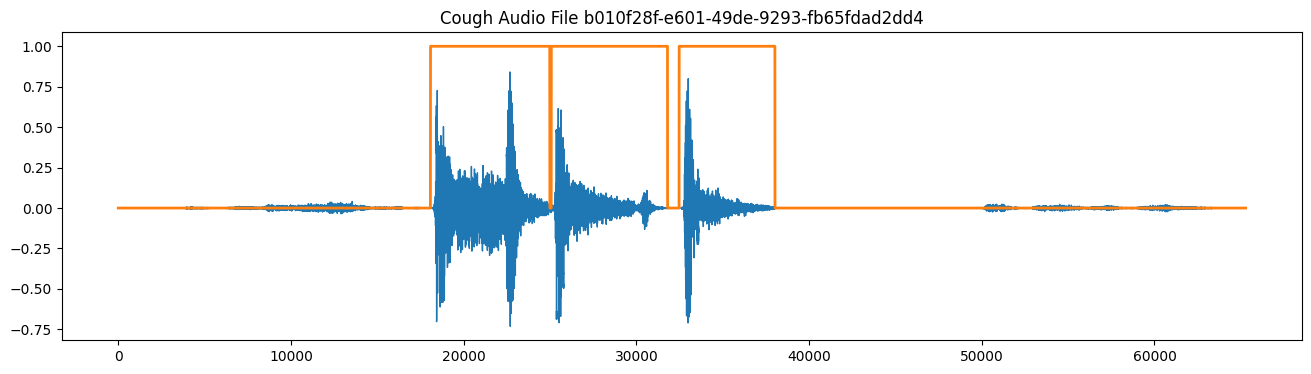

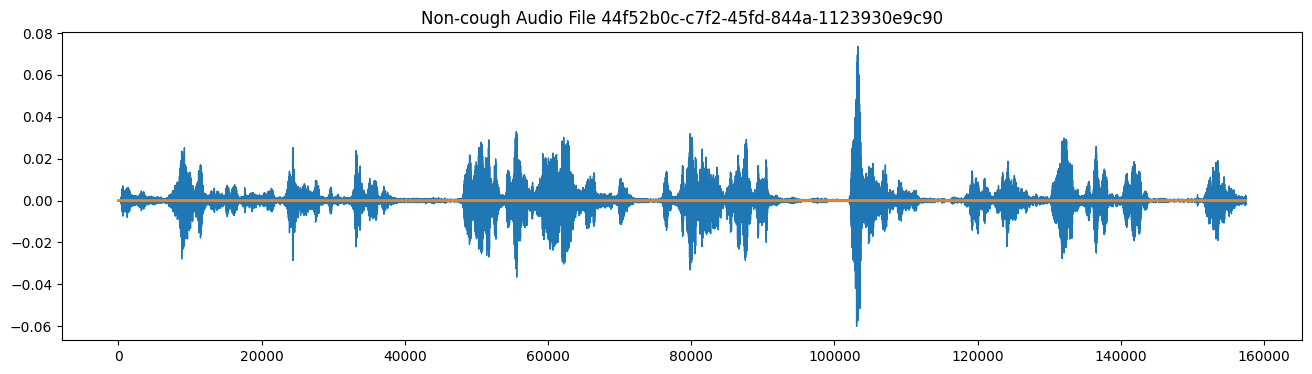

In [46]:
plot_amp_vs_label(title='Audio File', visual_set=visual_set, audio_df2=audio_df2, percent=0)

### Zoomed-in Plot of 1st File with Label

Max value 0.8411264419555664 pos 22681 20722,24639


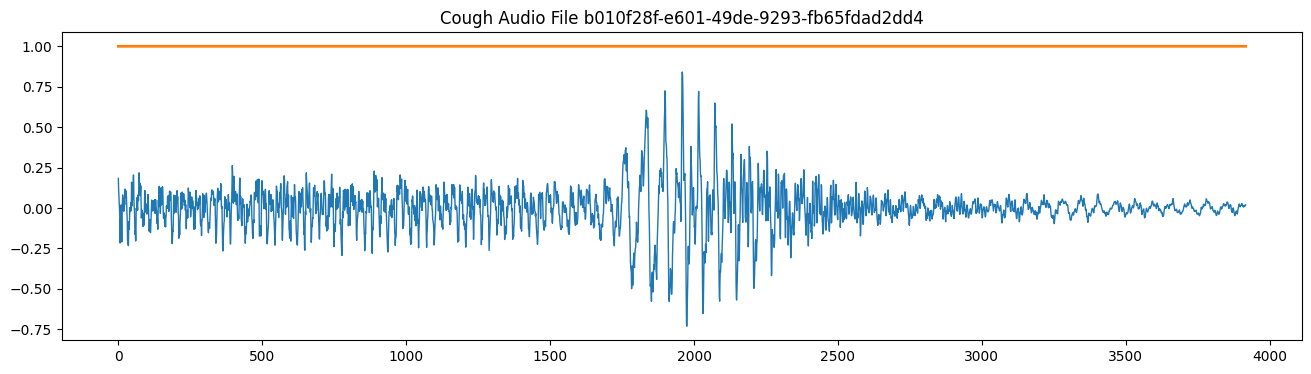

Max value 0.07364176213741302 pos 103256 98532,107979


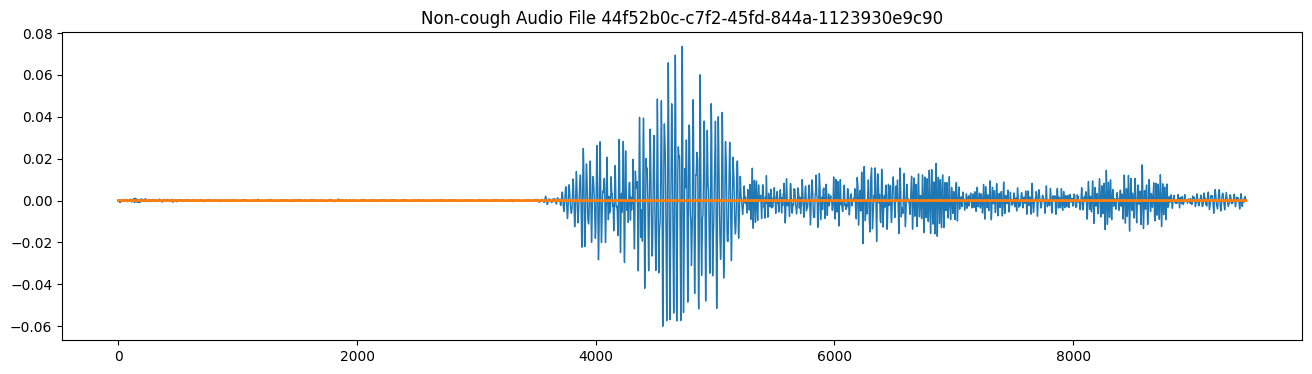

In [47]:
plot_amp_vs_label(title='Audio File', visual_set=visual_set, audio_df2=audio_df2, percent=0.03)

Max value 0.8411264419555664 pos 22681 22615,22746


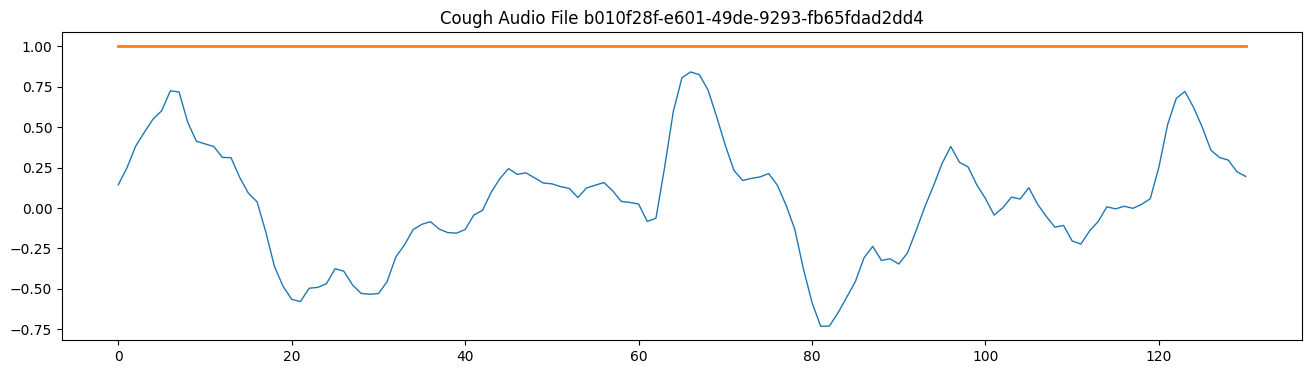

Max value 0.07364176213741302 pos 103256 103098,103413


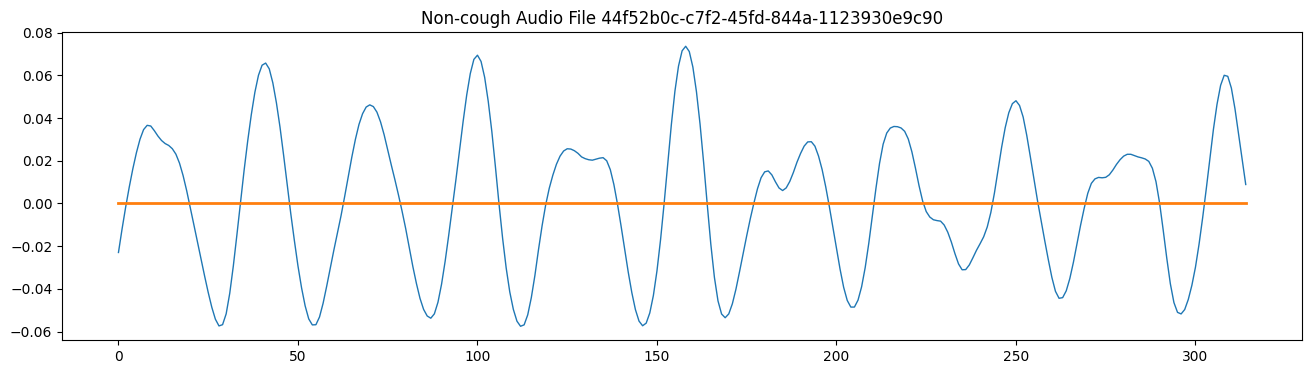

In [48]:
plot_amp_vs_label(title='Audio File', visual_set=visual_set, audio_df2=audio_df2, percent=0.001)

# Create Overlapping Frames from each Recording and Label each frame

### Rule for Labelling Frames
- Rule: >= 50% cough, frame = cough (**WRT to FR008** in the SRS)

### Rationale for selection of number of samples
- Human hearing time resoultion threshold starts from 10ms
- Timeframe of 1 Sample = 1/(Sampling Frequency). E.g 1/22050 = 0.045351474ms
- Hence, 1 frame must have not less than = 10 / 0.045351474 = 220.5 samples
- We will experiement with 256 samples (11.6ms), 512 samples (23.3ms), 1024 samples (46.4ms) (**WRT to FR006** in the SRS)

### Overlapping strategy & reasons
- To prevent loss of data at the edges of each frame after applying windowing function

- To reduce spectral leakage due to the discontiuities at the edges of each frame after applying fourier transform on frames, hence windowing will be performed to trim (to make the amplitude at edges of each frame close to zero) before applying the fourier transform on the frame.

- Thus, frames will be overlapped for 50% of the samples
e.g
- sample    = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16
- frame 1   = 1, 2, 3, 4
- frame 2   = ____  3, 4, 5, 6
- frame 3   = ____ ____ ____  5, 6, 7, 8


### Validation
- **Entry Criteria:**
- Dataframe with labels for start and end time of cough sounds

- **Exit Criteria:**

- TEST-001-5: For the first frame of a given audio recording, start index = 0, end index = Frame Size (e.g Frame Size = 1024)

- TEST-001-6: For consecutive frames of a given audio recording, start and end time must overlap by 50%. E.g frame 1 (start=0, end=Frame Size) frame 2(start=Frame Size/2, end=Frame Size/2 + Frame Size).
- E.g: Given Frame Size = 1024,   
- frame 1 = 0 - 1024   
- frame 2 = 512 - 1536

- TEST-001-7: For frames with max amplitude value of 0 must have label of 0

- TEST-001-8: Total number of unique keys must equal count of records in input dataframe

- TEST-001-9: For frames sorted based on max amplitude value in descending order, labels should most likely be 1

In [49]:
def apply_framing(audio_df):
  def create_overlapping_frames(key, amp, label, sf, frame_size, hop_length):
    # Calculate the total number of frames
    if len(amp) == len(label):
      total_frames = 1 + int((len(amp) - frame_size) / hop_length)
      dic = {"key":[], "sf":[], "start":[], "end":[], "max_amp":[], "frame_index":[], "amp":[], "label":[]}

      # Create overlapping frames
      for i in range(total_frames):
        dic["key"].append(key)
        dic["sf"].append(sf)
        dic["start"].append(i * hop_length)
        dic["end"].append(i * hop_length + frame_size)
        dic["max_amp"].append(np.max(amp[i * hop_length: i * hop_length + frame_size]))
        dic["frame_index"].append(i)
        dic["amp"].append(amp[i * hop_length: i * hop_length + frame_size])
        frames_label_raw = label[i * hop_length: i * hop_length + frame_size]

        f_label = 0
        if np.sum(frames_label_raw==1) > (len(frames_label_raw) / 2):
          f_label = 1
        dic["label"].append(f_label)

      return dic
    else:
      print('Error: non matching amp and labels', key, len(amp), len(label))

  def create_and_label_frames(audio_df):
    return create_overlapping_frames(audio_df.name, audio_df["amp"], audio_df["label"],audio_df["sf"],frame_size, hop_length)

  all_frames = {}
  for frame_size in [256, 512, 1024, 2048]:
    hop_length = frame_size // 2

    frame_df = pd.DataFrame()
    #xx = audio_df.head(1).apply(create_and_label_frames, axis=1)
    xx = audio_df.apply(create_and_label_frames, axis=1)
    for x in xx:
      if len(frame_df) > 0:
        frame_df = pd.concat([frame_df, pd.DataFrame(x)], ignore_index=True)
      else:
        frame_df = pd.DataFrame(x)

    all_frames[frame_size] = frame_df
    print(f'Frame size {frame_size}, hop_length {hop_length}, count {len(frame_df)}')
  return all_frames

all_frames = apply_framing(audio_df=audio_df2)
framed_df = all_frames[1024]
framed_df

Frame size 256, hop_length 128, count 333215
Frame size 512, hop_length 256, count 166399
Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222


,key,sf,start,end,max_amp,frame_index,amp,label
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,1024,0.006137,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,1536,0.023188,1,"[-0.00024980583, -0.00026363018, -0.0002713691...",0
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1024,2048,0.074459,2,"[-0.0018562947, -0.0023917924, -0.0028657983, ...",0
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,1536,2560,0.074459,3,"[0.0014159846, -0.0015856944, -0.0045660823, -...",0
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,2048,3072,0.079874,4,"[0.031991042, 0.025611315, 0.019131511, 0.0129...",0
...,...,...,...,...,...,...,...,...
82952,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,59904,60928,0.021871,117,"[-0.021708837, -0.022235444, -0.021958912, -0....",0
82953,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60416,61440,0.001310,118,"[0.00046911323, 0.0005246451, 0.00047831138, 0...",0
82954,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,60928,61952,0.000399,119,"[4.2529864e-05, 2.6461403e-05, 3.3375203e-05, ...",0
82955,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,61440,62464,0.000332,120,"[0.0003304775, 0.0003139911, 0.00031356188, 0....",0


In [50]:
framed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82957 entries, 0 to 82956
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          82957 non-null  object 
 1   sf           82957 non-null  int64  
 2   start        82957 non-null  int64  
 3   end          82957 non-null  int64  
 4   max_amp      82957 non-null  float32
 5   frame_index  82957 non-null  int64  
 6   amp          82957 non-null  object 
 7   label        82957 non-null  int64  
dtypes: float32(1), int64(5), object(2)
memory usage: 4.7+ MB


In [51]:
# TEST-001-8: Total number of unique keys must equal count of records in input dataframe
framed_df['key'].describe()

count                                    82957
unique                                     300
top       94cefab8-6d46-41c3-908e-59553106ad03
freq                                      3477
Name: key, dtype: object

In [52]:
framed_df.describe()

,sf,start,end,max_amp,frame_index,label
count,82957.0,8.295700e+04,8.295700e+04,82957.000000,82957.000000,82957.000000
mean,16000.0,1.574450e+05,1.584690e+05,0.089949,307.509734,0.105983
std,0.0,2.785881e+05,2.785881e+05,0.199448,544.117453,0.307817
min,16000.0,0.000000e+00,1.024000e+03,-0.003346,0.000000,0.000000
25%,16000.0,3.686400e+04,3.788800e+04,0.000130,72.000000,0.000000
50%,16000.0,8.140800e+04,8.243200e+04,0.003839,159.000000,0.000000
75%,16000.0,1.305600e+05,1.315840e+05,0.049952,255.000000,0.000000
max,16000.0,1.779712e+06,1.780736e+06,1.128159,3476.000000,1.000000


In [53]:
# TEST-001-9: For frames sorted based on max amplitude value in descending order, labels should most likely be 1
framed_df.sort_values(by='max_amp', ascending=False)

,key,sf,start,end,max_amp,frame_index,amp,label
27278,bae0c88f-852c-4f3f-8141-d037c777459e,16000,33792,34816,1.128159,66,"[0.5138564, -0.3062803, -0.51623523, 0.1827676...",1
27279,bae0c88f-852c-4f3f-8141-d037c777459e,16000,34304,35328,1.128159,67,"[-0.25283235, -0.7617363, -0.84030735, -0.0517...",1
27275,bae0c88f-852c-4f3f-8141-d037c777459e,16000,32256,33280,1.084224,63,"[0.19462553, -0.10762766, -0.05061951, 0.10678...",1
27274,bae0c88f-852c-4f3f-8141-d037c777459e,16000,31744,32768,1.084224,62,"[-0.00059483934, 0.0018378963, 0.0022573345, 0...",1
27280,bae0c88f-852c-4f3f-8141-d037c777459e,16000,34816,35840,1.068244,68,"[-0.3498913, -0.22780204, -0.092796125, 0.3381...",1
...,...,...,...,...,...,...,...,...
9037,19aee4cd-6c70-48c8-a1f1-635c674686fa,16000,7680,8704,-0.002882,15,"[-0.003632847, -0.003643474, -0.0036434892, -0...",0
5537,85d0222c-3a14-473a-8823-c2216254444f,16000,7168,8192,-0.003026,14,"[-0.003725661, -0.0037426772, -0.0037357253, -...",0
5536,85d0222c-3a14-473a-8823-c2216254444f,16000,6656,7680,-0.003105,13,"[-0.0031069145, -0.0031202803, -0.0031384337, ...",0
9035,19aee4cd-6c70-48c8-a1f1-635c674686fa,16000,6656,7680,-0.003259,13,"[-0.0032715476, -0.0032965322, -0.0032847517, ...",0


## Visual Validation of Overlapping Frames
- Plot first consecutive frames on both sides from the frame with max amplitude in an audio recording

In [54]:
framed_df = all_frames[256]
framed_df

,key,sf,start,end,max_amp,frame_index,amp,label
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,256,3.927506e-06,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,128,384,8.309323e-05,1,"[2.9860073e-11, -2.5889133e-11, -1.1167527e-11...",0
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,256,512,2.909576e-04,2,"[-0.00010737518, -7.2910276e-05, -1.8271068e-0...",0
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,384,640,7.567552e-04,3,"[8.022578e-06, -3.5284545e-05, -5.1927687e-05,...",0
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,768,2.304477e-03,4,"[-0.00024980583, -0.00026363018, -0.0002713691...",0
...,...,...,...,...,...,...,...,...
333210,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62592,62848,3.051765e-05,489,"[3.051757e-05, 3.0517593e-05, 3.0517574e-05, 3...",0
333211,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62720,62976,3.315393e-05,490,"[3.0517593e-05, 3.0517585e-05, 3.0517585e-05, ...",0
333212,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62848,63104,3.315393e-05,491,"[3.0517473e-05, 3.0517742e-05, 3.051736e-05, 3...",0
333213,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62976,63232,1.098828e-08,492,"[-1.3406767e-08, 1.0988277e-08, -8.675035e-09,...",0


128


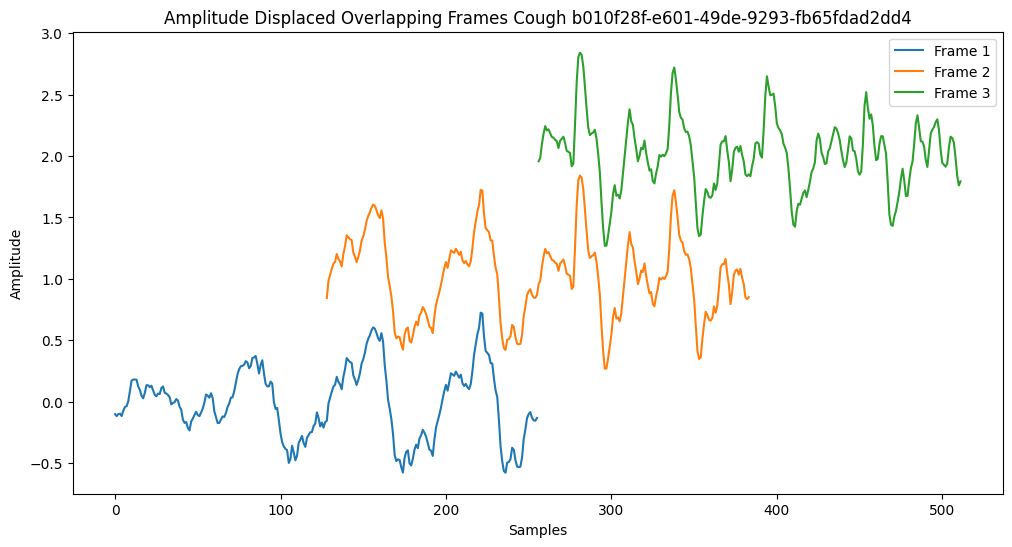

128


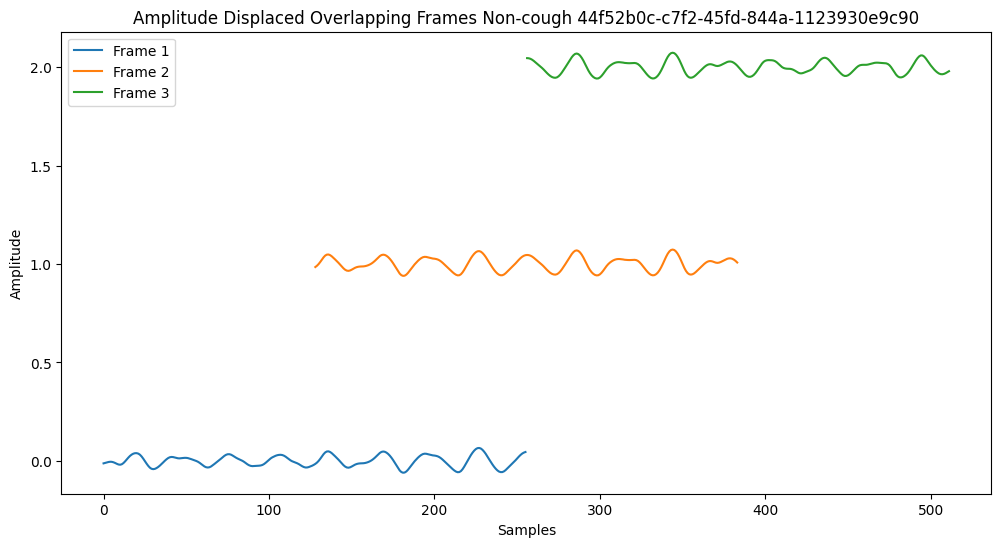

In [55]:
def visualize_overlapping_frames(title, framed_df, visual_set):
  for i, v in visual_set.items():
    #print( framed_df[framed_df["key"] == v]["max_amp"].idxmax() )
    findex = framed_df[framed_df["key"] == v]["max_amp"].idxmax() - 1
    hop_length = (framed_df.loc[findex]["end"] - framed_df.loc[findex]["start"]) // 2
    print(hop_length)
    frame1 = framed_df.loc[findex]["amp"]
    frame2 = framed_df.loc[findex+1]["amp"]
    frame3 = framed_df.loc[findex+2]["amp"]
    # Plot the overlapping frames
    plt.figure(figsize=(12, 6))

    # Plot first frame
    plt.plot(np.arange(len(frame1)), frame1, label='Frame 1')

    # Plot second frame
    plt.plot(np.arange(hop_length, hop_length + len(frame2)), frame2 + 1, label='Frame 2')

    # Plot third frame
    plt.plot(np.arange(2 * hop_length, 2 * hop_length + len(frame3)), frame3 + 2, label='Frame 3')

    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.title(f'{title} {i} {v}')
    plt.legend()
    plt.show()

visualize_overlapping_frames(title='Amplitude Displaced Overlapping Frames', framed_df=framed_df, visual_set=visual_set)

# Save Audio DataFrame before Framing
- Reasons:
- after framing, dataset becomes large btw 90MB to 165MB for each frame size
- in contrast to saving only 1 file of i.e the dataset before framing
- also this is a better approach because the framing algorithm only takes about 25 seconds to run
- to validate reading the file, test data read code is provided

In [56]:
#csv_files = ["/content/audio_data_before_framing.feather"]
csv_files = [f"/content/drive/My Drive/{GDRIVE_DATA_DIR}audio_data_300_before_framing_16Khz.feather"]

df_to_save = audio_df2.copy()
df_to_save.reset_index(inplace=True)
df_to_save.to_feather(csv_files[0])

### Test to Validate Reading the Saved File

In [57]:
df_from_save = pd.read_feather(csv_files[0])
df_from_save['key'] = df_from_save['index']
df_from_save.drop(columns=['index'], inplace=True)
df_from_save.set_index('key', inplace=True)
df_from_save

,amp,amp_original,sf,sf_original,shape,shape_original,cough_start_end,label
key,,,,,,,,
b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...","[6.2792744e-12, 1.3262988e-11, 2.1134771e-11, ...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
b9408db9-881b-4a95-ba6c-ac51602955a6,"[5.813955e-10, -7.632952e-10, -1.9169968e-09, ...","[5.454812e-10, -7.5795303e-10, -2.2023776e-09,...",16000,22050,[33600],[46305],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e9bf0a5a-ff96-480b-a54a-f647143e1d6f,"[6.08183e-09, 3.8103284e-08, 4.4398583e-08, 3....","[-7.584575e-09, -2.4847802e-09, 3.0562568e-08,...",16000,22050,[158400],[218295],"[[2.777657, 3.235886]]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
e4729edf-12e5-4ba9-883e-1114c32b90f0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,[76800],[105840],"[[1.095201, 1.89583], [2.581275, 3.028796], [3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4c2840ed-fd4b-4a86-b976-5cc040d6ea4e,"[-1.8455714e-06, 2.195019e-06, -2.6295957e-06,...","[8.198129e-08, 1.3033329e-07, -3.5484481e-07, ...",16000,22050,[52800],[72765],"[[1.159085, 1.526838], [1.682357, 2.00403], [2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
48b287c0-5c2b-44ef-b469-3808b3b287ea,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,[155520],[214326],"[[3.495979, 3.855312], [3.903984, 4.322203], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52f6838a-4033-4a71-84bb-81cbb4e64ab7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,[158400],[218295],"[[1.940096, 2.406454], [2.435831, 2.798757], [...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7a8bd218-252f-4d84-a035-0d3262efa825,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",16000,22050,[159019],[219148],None,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Test to Create Frames and Labels from the Saved File Data

In [58]:
all_frames_from_save = apply_framing(audio_df=df_from_save)

Frame size 256, hop_length 128, count 333215
Frame size 512, hop_length 256, count 166399
Frame size 1024, hop_length 512, count 82957
Frame size 2048, hop_length 1024, count 41222


In [59]:
df_frame_from_save = all_frames_from_save[256]
df_frame_from_save

,key,sf,start,end,max_amp,frame_index,amp,label
0,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,0,256,3.927506e-06,0,"[1.6998944e-11, 1.6948607e-11, -3.3269082e-11,...",0
1,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,128,384,8.309323e-05,1,"[2.9860073e-11, -2.5889133e-11, -1.1167527e-11...",0
2,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,256,512,2.909576e-04,2,"[-0.00010737518, -7.2910276e-05, -1.8271068e-0...",0
3,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,384,640,7.567552e-04,3,"[8.022578e-06, -3.5284545e-05, -5.1927687e-05,...",0
4,b8cda82e-6549-4d43-aad9-8de9bcf8e0e9,16000,512,768,2.304477e-03,4,"[-0.00024980583, -0.00026363018, -0.0002713691...",0
...,...,...,...,...,...,...,...,...
333210,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62592,62848,3.051765e-05,489,"[3.051757e-05, 3.0517593e-05, 3.0517574e-05, 3...",0
333211,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62720,62976,3.315393e-05,490,"[3.0517593e-05, 3.0517585e-05, 3.0517585e-05, ...",0
333212,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62848,63104,3.315393e-05,491,"[3.0517473e-05, 3.0517742e-05, 3.051736e-05, 3...",0
333213,0f8d80f9-700e-4069-924d-e15f29d7c19a,16000,62976,63232,1.098828e-08,492,"[-1.3406767e-08, 1.0988277e-08, -8.675035e-09,...",0


128


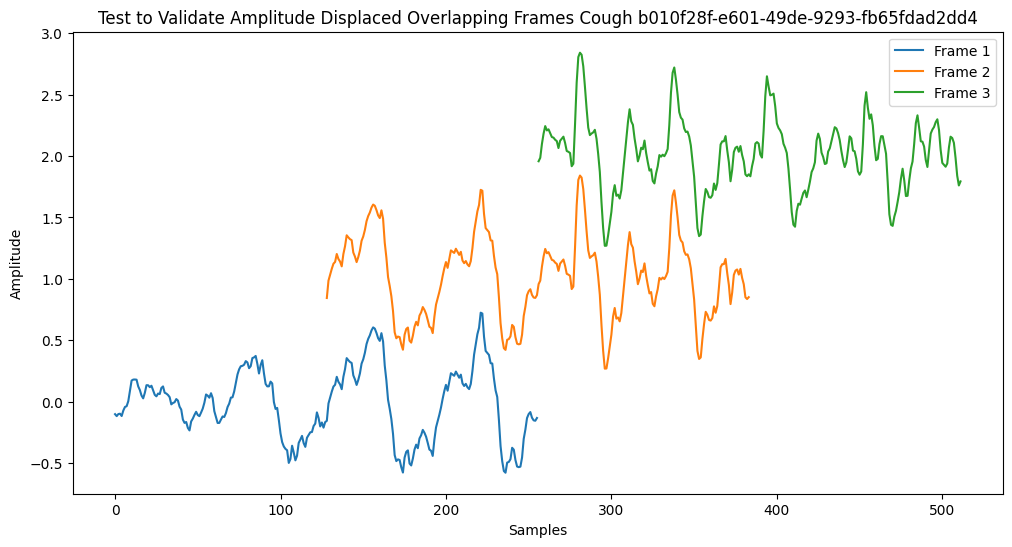

128


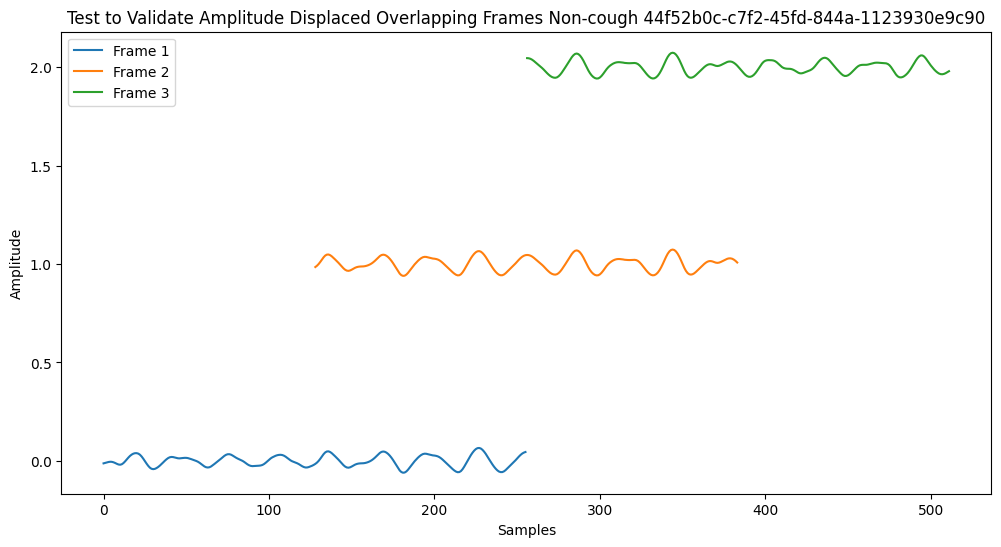

In [60]:
visualize_overlapping_frames(title='Test to Validate Amplitude Displaced Overlapping Frames', framed_df=df_frame_from_save, visual_set=visual_set)